# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


TARGET = "ICU Beds_x"
limit_min = 0.75
limit_max = 1


In [13]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df = pd.read_csv(url, header=0, sep=",")

In [17]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [19]:
df.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
435,13103,62190,8829,14.196816,9115,14.656697,7809,12.556681,9035,14.528059,...,3379,10.5,9.8,11.3,4812,2.7,2.5,2.8,1215,3
119,5021,14847,1772,11.935071,1761,11.860982,1750,11.786893,1604,10.803529,...,1435,14.6,13.4,15.7,1692,3.9,3.6,4.3,458,6
2718,48395,17284,2283,13.208748,2252,13.029391,2009,11.623467,2039,11.797038,...,1147,14.7,13.9,15.6,1929,3.7,3.5,3.9,480,4
1750,32011,2003,245,12.231653,271,13.529705,171,8.537194,236,11.782327,...,128,11.2,10.5,11.9,171,3.0,2.9,3.2,46,5
1012,21043,27004,3328,12.324100,3419,12.661087,3341,12.372241,2932,10.857651,...,3074,16.6,15.2,17.8,3470,3.9,3.6,4.3,817,6
37,1075,13844,1498,10.820572,1745,12.604739,1463,10.567755,1471,10.625542,...,1345,16.8,15.5,18.0,1823,4.1,3.8,4.4,442,6
270,8055,6889,562,8.157933,673,9.769197,539,7.824067,612,8.883728,...,475,13.5,12.5,14.3,777,4.2,4.0,4.5,244,6
2482,47113,97605,12083,12.379489,13272,13.597664,13493,13.824087,11316,11.593668,...,7220,15.0,14.1,16.0,11365,3.5,3.3,3.7,2672,4
1857,36063,210433,22550,10.716000,24525,11.654541,25988,12.349774,24928,11.846051,...,15362,12.4,11.4,13.4,20854,3.2,3.0,3.5,5408,2
2489,47127,6411,584,9.109343,772,12.041803,712,11.105912,663,10.341600,...,581,13.9,12.7,15.1,724,3.5,3.2,3.8,183,5


<AxesSubplot:>

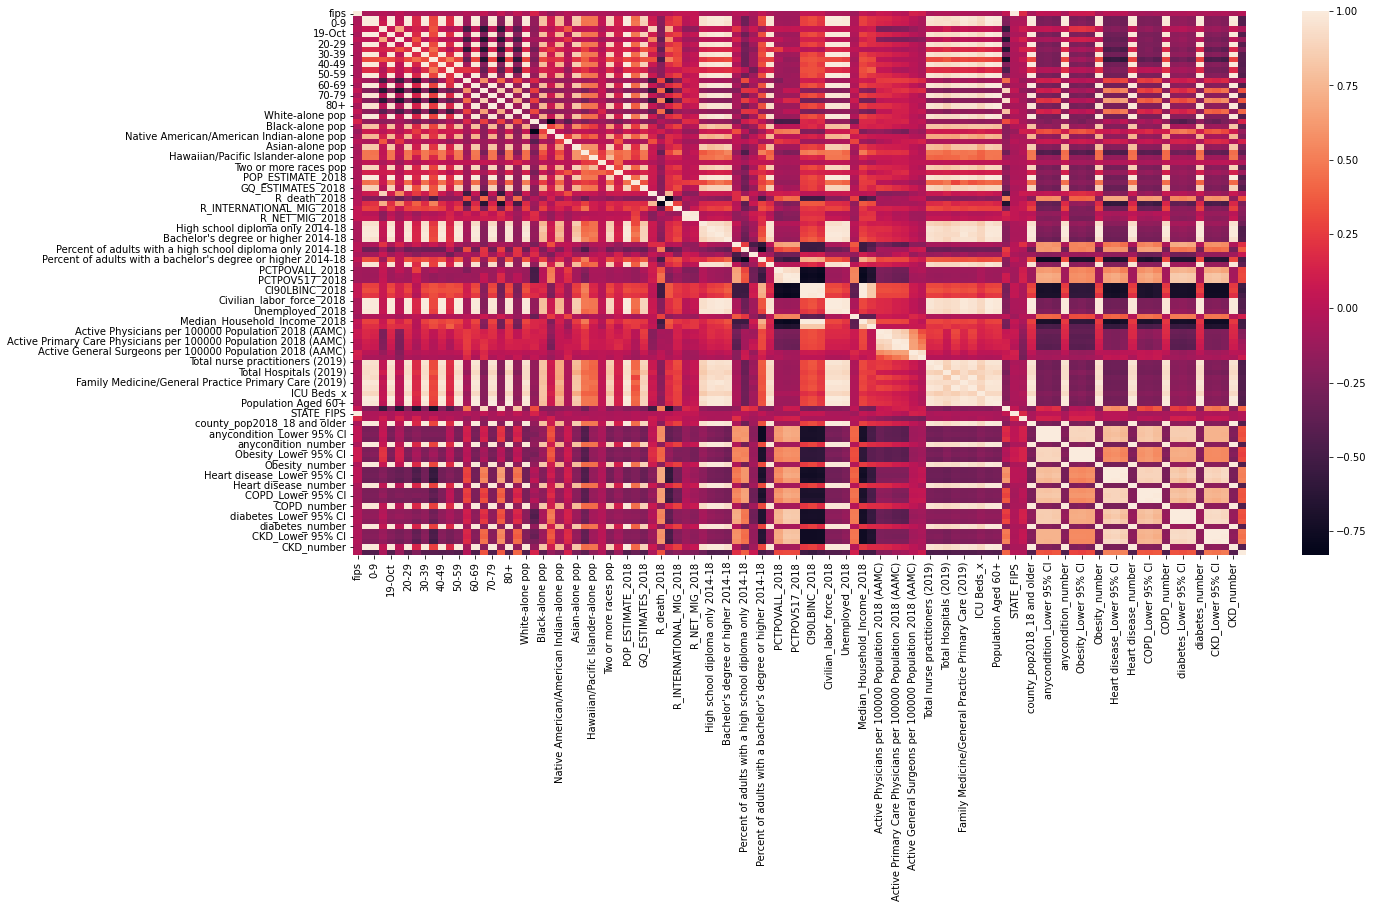

In [27]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr)

In [43]:
np.abs(corr[TARGET])
filtro = corr[TARGET][(np.abs(corr[TARGET])<limit_max) & (np.abs(corr[TARGET])>limit_min)]
list(filtro.index)
df = df.drop(columns=filtro.index)

KeyError: '[\'TOT_POP\', \'0-9\', \'19-Oct\', \'20-29\', \'30-39\', \'40-49\', \'50-59\', \'60-69\', \'70-79\', \'80+\', \'White-alone pop\', \'Black-alone pop\', \'Two or more races pop\', \'POP_ESTIMATE_2018\', \'GQ_ESTIMATES_2018\', \'Less than a high school diploma 2014-18\', \'High school diploma only 2014-18\', "Some college or associate\'s degree 2014-18", "Bachelor\'s degree or higher 2014-18", \'POVALL_2018\', \'Civilian_labor_force_2018\', \'Employed_2018\', \'Unemployed_2018\', \'Total nurse practitioners (2019)\', \'Total physician assistants (2019)\', \'Total Hospitals (2019)\', \'Internal Medicine Primary Care (2019)\', \'Family Medicine/General Practice Primary Care (2019)\', \'Total Specialist Physicians (2019)\', \'Total Population\', \'Population Aged 60+\', \'county_pop2018_18 and older\', \'anycondition_number\', \'Obesity_number\', \'Heart disease_number\', \'COPD_number\', \'diabetes_number\', \'CKD_number\'] not found in axis'

In [44]:
df

,fips,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,1001,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,...,8.6,7.3,9.9,12.9,11.9,13.8,3.1,2.9,3.3,3
1,1003,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,...,8.6,7.2,10.1,12.0,11.0,13.1,3.2,3.0,3.5,4
2,1005,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,...,12.1,10.7,13.3,19.7,18.6,20.6,4.5,4.2,4.8,6
3,1007,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,...,10.0,8.8,11.3,14.1,13.2,14.9,3.3,3.1,3.6,2
4,1009,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,...,10.5,9.1,12.0,13.5,12.6,14.5,3.4,3.2,3.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,2.204362,...,6.6,5.7,7.7,8.9,8.3,9.6,2.6,2.4,2.8,5
3136,56039,10.328842,9.466661,12.854729,17.733200,14.830380,12.685759,12.456133,6.797799,2.846497,...,4.9,4.0,6.0,7.2,6.5,8.0,2.4,2.2,2.6,5
3137,56041,15.375142,15.788955,10.606434,13.311001,11.773979,11.990738,12.581901,6.074191,2.497660,...,8.0,7.0,9.2,10.4,9.5,11.2,3.0,2.8,3.2,5
3138,56043,10.881420,14.115409,9.067850,11.452124,11.414077,13.760304,14.178821,9.397590,5.732403,...,8.3,7.1,9.6,11.3,10.3,12.1,3.4,3.2,3.7,6
